<font color= "maroon"> **Problem Statment** </font>

Given the following data set(salesdata), can you plot a chart that shows the percent of revenue by marketing source?

You can assume that purchase_value is revenue in this case, and you'll have to calculate the percent of revenue by source prior to plotting.

<font color = 'blue'>Step 1: Loading Data File </font>

In [1]:
import pandas as pd
smc_data = pd.read_csv("/Users/gauravsharma/Documents/Interview_QS/Q-83/Sales_data.csv")

In [2]:
smc_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08


In [3]:
smc_data.shape

(151112, 10)

In [4]:
smc_data['source'].value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

In [5]:
smc_data_grouped = smc_data.groupby(['source'])
smc_data_grouped = smc_data_grouped[['purchase_value']].sum()
smc_data_grouped = smc_data_grouped.apply(lambda x: 100 * x/x.sum()).reset_index()
smc_data_grouped.dtypes

source             object
purchase_value    float64
dtype: object

In [6]:
smc_data_grouped.head()

,source,purchase_value
0,Ads,39.616256
1,Direct,20.263293
2,SEO,40.120451


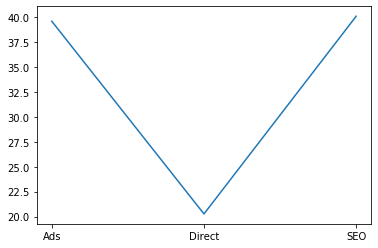

In [12]:
import matplotlib.pyplot as plt
plt.plot(smc_data_grouped.source,smc_data_grouped.purchase_value)

In [8]:
#smc_data_grouped_2 = smc_data.groupby('source')['purchase_value'].sum()
#smc_data_grouped_2

In [9]:
#smc_data_grouped_2.shape

In [10]:
#smc_data_a = smc_data_grouped.groupby(['source'], as_index=False).agg({'purchase_value': 'sum'})
#smc_data_a
#smc_data_a.columns

In [11]:
#smc_data_grouped_2.apply(lambda x: x/x.sum())